In [1]:
library(tidyverse)
plot.scale <- 1.5
options(
    jupyter.rich_display = FALSE,
    repr.plot.width = 16/plot.scale,
    repr.plot.height = 9/plot.scale)
ggplot2::theme_set(theme_minimal())

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
df <- read_csv("/Users/stawager/Repos/dataAnalysisR_ifs2025/20250401/studenci.csv", col_select = c(-1))

New names:
• `` -> `...1`
Rows: 822 Columns: 131
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (67): V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20...
dbl  (33): V1, V2, V27, V28, V29, V30, V31, V32, V33, V34, V35, V36, V37, V3...
lgl   (2): V103, V104
dttm  (2): V3, V4
time (27): V5, V6, V106, V107, V108, V109, V110, V111, V112, V113, V114, V11...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
dim(df)

[1] 822 131

In [4]:
glimpse(df)

Rows: 822
Columns: 131
$ V1       <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18…
$ V2       <dbl> 398222606, 398230046, 398235212, 398260799, 398447159, 398448…
$ V3       <dttm> 2024-01-15 14:19:21, 2024-01-15 15:20:12, 2024-01-15 15:27:5…
$ V4       <dttm> 2024-01-15 14:27:23, 2024-01-15 15:28:51, 2024-01-15 16:18:1…
$ V5       <time> 00:08:02, 00:08:39, 00:50:20, 00:06:19, 00:18:01, 00:20:54, …
$ V6       <time> 00:08:02, 00:08:39, 00:50:20, 00:06:19, 00:18:01, 00:20:54, …
$ V7       <chr> "Filozofia", "Biotechnologia", "Biotechnologia", "Biotechnolo…
$ V8       <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ V9       <chr> "Stacjonarne", "Stacjonarne", "Stacjonarne", "Stacjonarne", "…
$ V10      <chr> "Pierwszy", "Pierwszy", "Pierwszy", "Pierwszy", "Pierwszy", "…
$ V11      <chr> "Drugi", "Trzeci", "Trzeci", "Drugi", "Trzeci", NA, NA, NA, "…
$ V12      <chr> NA, NA, NA, NA, NA, "Drugi", NA, NA, NA, "Drugi", NA, "Pierws…
$ V13      <chr> 

V19 (ogólna satysfakcja ze studiów)  
V21 – wyposażenie uczelni,   
V22 – poziom zajęć,   
V23 – stosunek administracji do studentów,   
V26 – możliwość udziału w realizacji badań naukowych.  

V10 (rodzaj studiów),   
V87 (Płeć),   
V89 (Wielkość miejscowości)   
oraz Uczelnia.

In [5]:
library(RColorBrewer)

In [6]:
df <- df %>%
  mutate(across(c(V21, V22, V23, V26), ~ as.numeric(.)),
         skala_satysfakcji = rowMeans(across(c(V21, V22, V23, V26)), na.rm = TRUE))

Warning message:
“There were 4 warnings in `mutate()`.
The first warning was:
ℹ In argument: `across(c(V21, V22, V23, V26), ~as.numeric(.))`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 3 remaining warnings.”


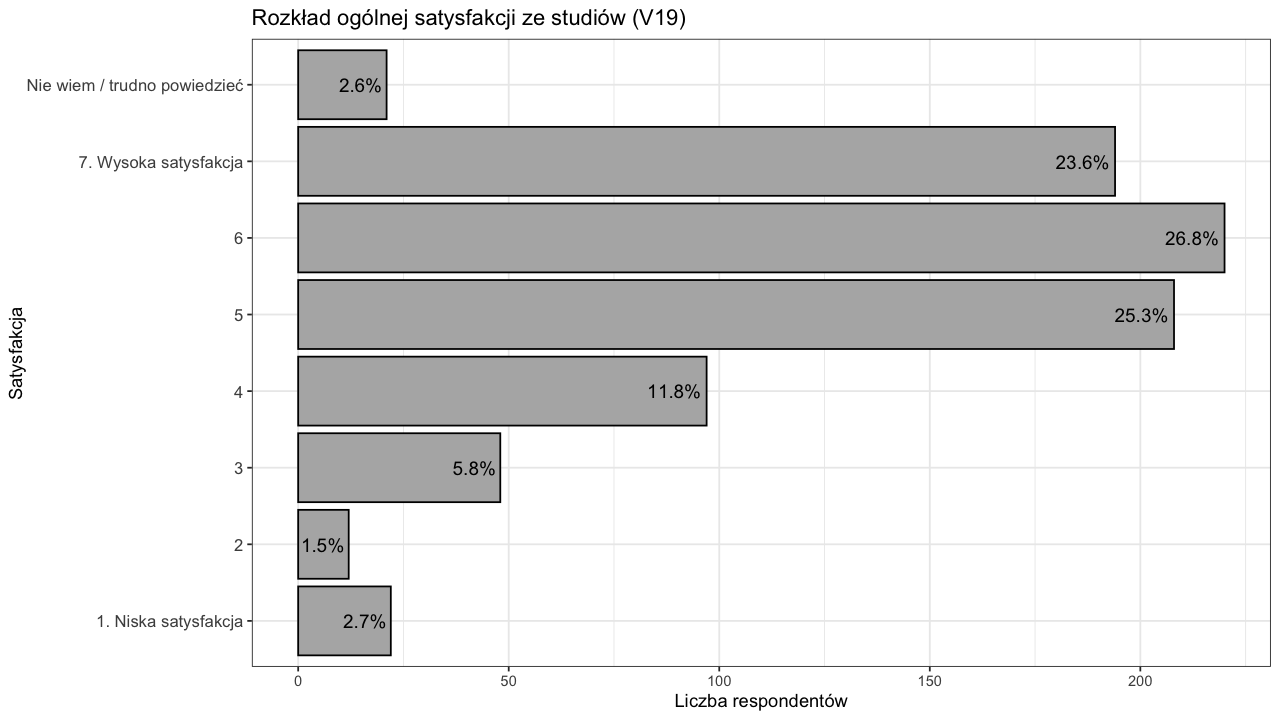

In [7]:
plot1 <- df %>%
  group_by(V19) %>%
  summarise(count = n()) %>%
  mutate(perc = round(count / sum(count) * 100, 1)) %>%
  ggplot(aes(y = V19, x = count)) +
  geom_bar(stat = "identity", fill = "grey70", color = "black", orientation = "y") +
  geom_text(aes(label = paste0(perc, "%")), hjust = 1.1, size = 4) +
  labs(title = "Rozkład ogólnej satysfakcji ze studiów (V19)",
       y = "Satysfakcja",
       x = "Liczba respondentów") +
  theme_bw() +
  theme(legend.position = "top",
        axis.text.y = element_text(size = 10))

plot1 # tu nie potrzeba legendy

Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`).”


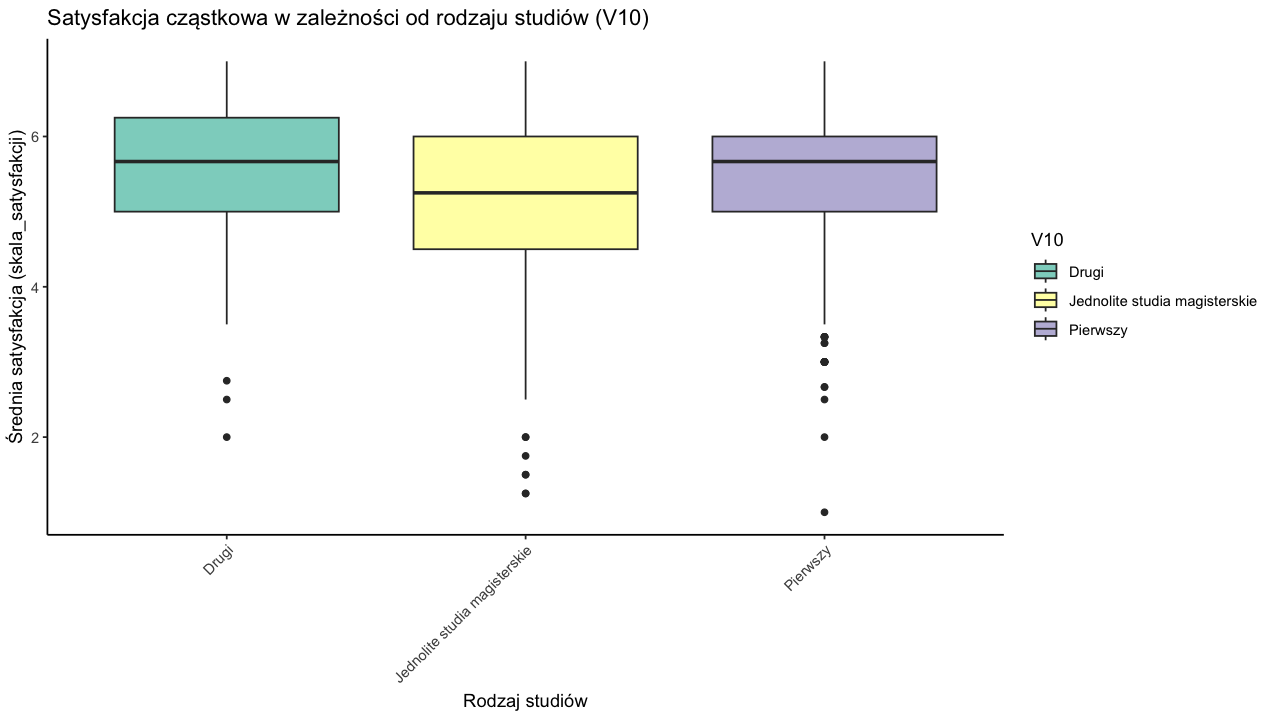

In [8]:
plot2 <- ggplot(df, aes(x = V10, y = skala_satysfakcji, fill = V10)) +
  geom_boxplot() +
  labs(title = "Satysfakcja cząstkowa w zależności od rodzaju studiów (V10)",
       x = "Rodzaj studiów",
       y = "Średnia satysfakcja (skala_satysfakcji)") +
  scale_fill_brewer(palette = "Set3") +
  theme_classic() +
  theme(legend.position = "right",
        axis.text.x = element_text(angle = 45, hjust = 1))

plot2

`summarise()` has grouped output by 'V87'. You can override using the `.groups`
argument.


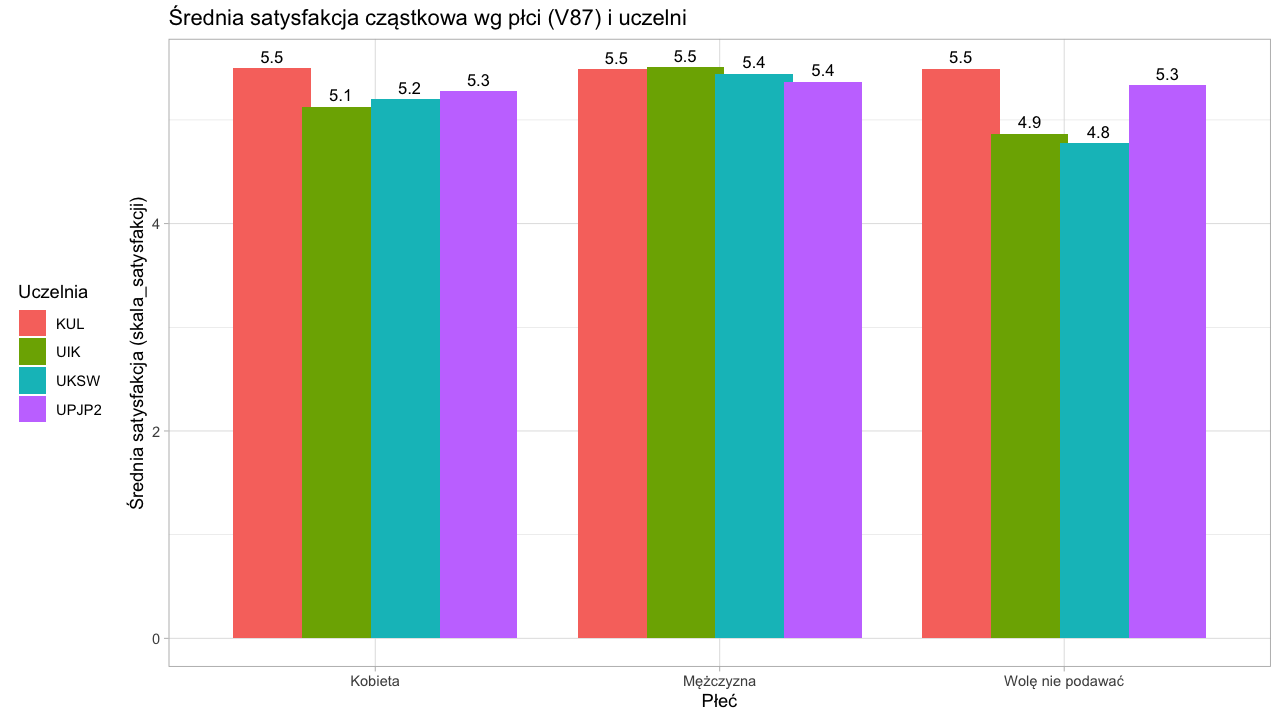

In [9]:
plot3 <- df %>%
  group_by(V87, Uczelnia) %>%
  summarise(mean_sat = mean(skala_satysfakcji, na.rm = TRUE)) %>%
  ggplot(aes(x = V87, y = mean_sat, fill = Uczelnia)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.8)) +
  geom_text(aes(label = round(mean_sat, 1)), 
            position = position_dodge(width = 0.8), 
            vjust = -0.5, size = 3.5) +
  labs(title = "Średnia satysfakcja cząstkowa wg płci (V87) i uczelni",
       x = "Płeć",
       y = "Średnia satysfakcja (skala_satysfakcji)",
       fill = "Uczelnia") +
  theme_light() +
  theme(legend.position = "left")

plot3